#Decision Tree Classifier on Non-linear make_moons Data

📚 Objective:

Build and evaluate a Decision Tree Classifier using synthetic non-linear data (make_moons). Visualize decision boundaries and performance metrics.

#✅ Step 1: Import Required Libraries

In [37]:
# Import all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report


#✅ Step 2: Generate Synthetic Non-linear Data


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127769 (\N{CRESCENT MOON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


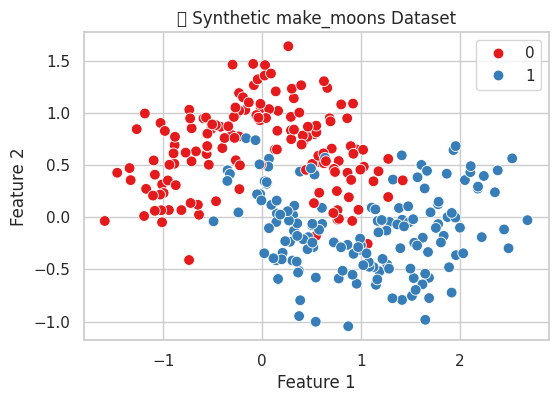

In [38]:
# Generate 2D non-linear classification data using make_moons
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)

# Visualize the data
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='Set1', s=60)
plt.title("🌙 Synthetic make_moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


#✅ Step 3: Train-Test Split

In [39]:
# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#✅ Step 4: Train a Decision Tree Classifier

In [40]:
# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

#✅ Step 5: Make Predictions and Evaluate

✅ Test Accuracy: 0.90

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        26
           1       0.91      0.91      0.91        34

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


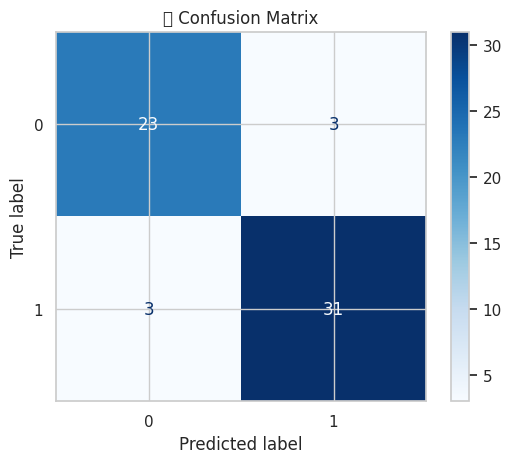

In [41]:
# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Test Accuracy: {accuracy:.2f}")

# Print classification report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("🔍 Confusion Matrix")
plt.show()


#✅ Step 6: Visualize Decision Boundary

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127756 (\N{MILKY WAY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


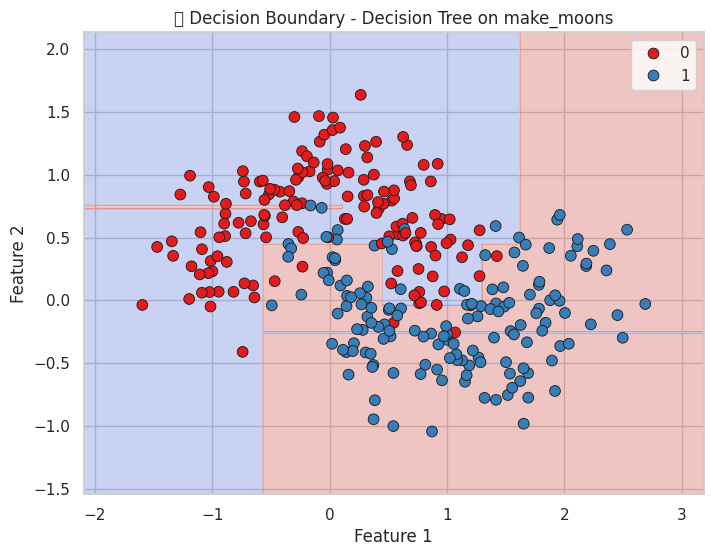

In [42]:
# Function to plot decision boundary
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict over the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, s=60, palette='Set1', edgecolor='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

# Call the plotting function
plot_decision_boundary(dt_model, X, y, title="🌌 Decision Boundary - Decision Tree on make_moons")


#✅ Bonus Step: Try Other max_depth Values

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


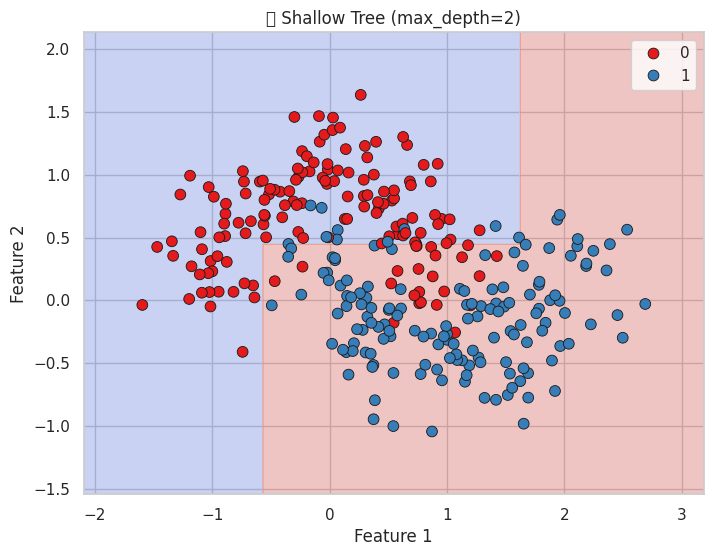

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


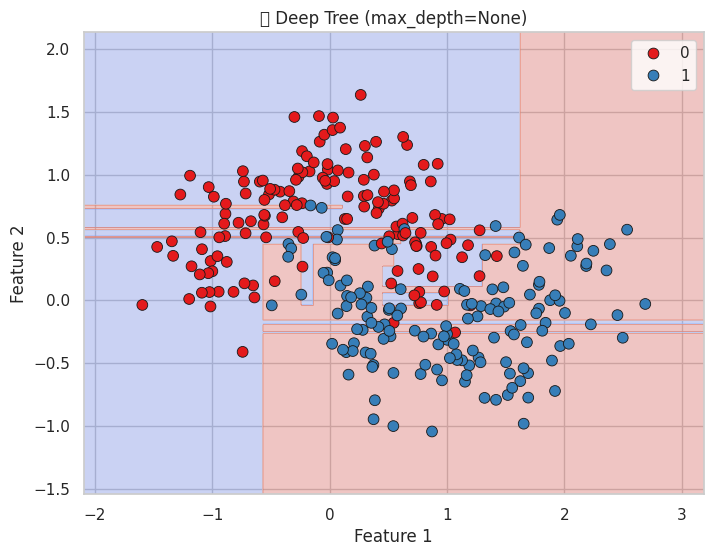

In [43]:
# Try shallower tree to understand underfitting
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state=42)
shallow_tree.fit(X_train, y_train)
plot_decision_boundary(shallow_tree, X, y, title="🌳 Shallow Tree (max_depth=2)")

# Try deeper tree to check overfitting
deep_tree = DecisionTreeClassifier(max_depth=None, random_state=42)
deep_tree.fit(X_train, y_train)
plot_decision_boundary(deep_tree, X, y, title="🌲 Deep Tree (max_depth=None)")


#✅ 🔍 Step 7: Plot the Trained Decision Tree Structure

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


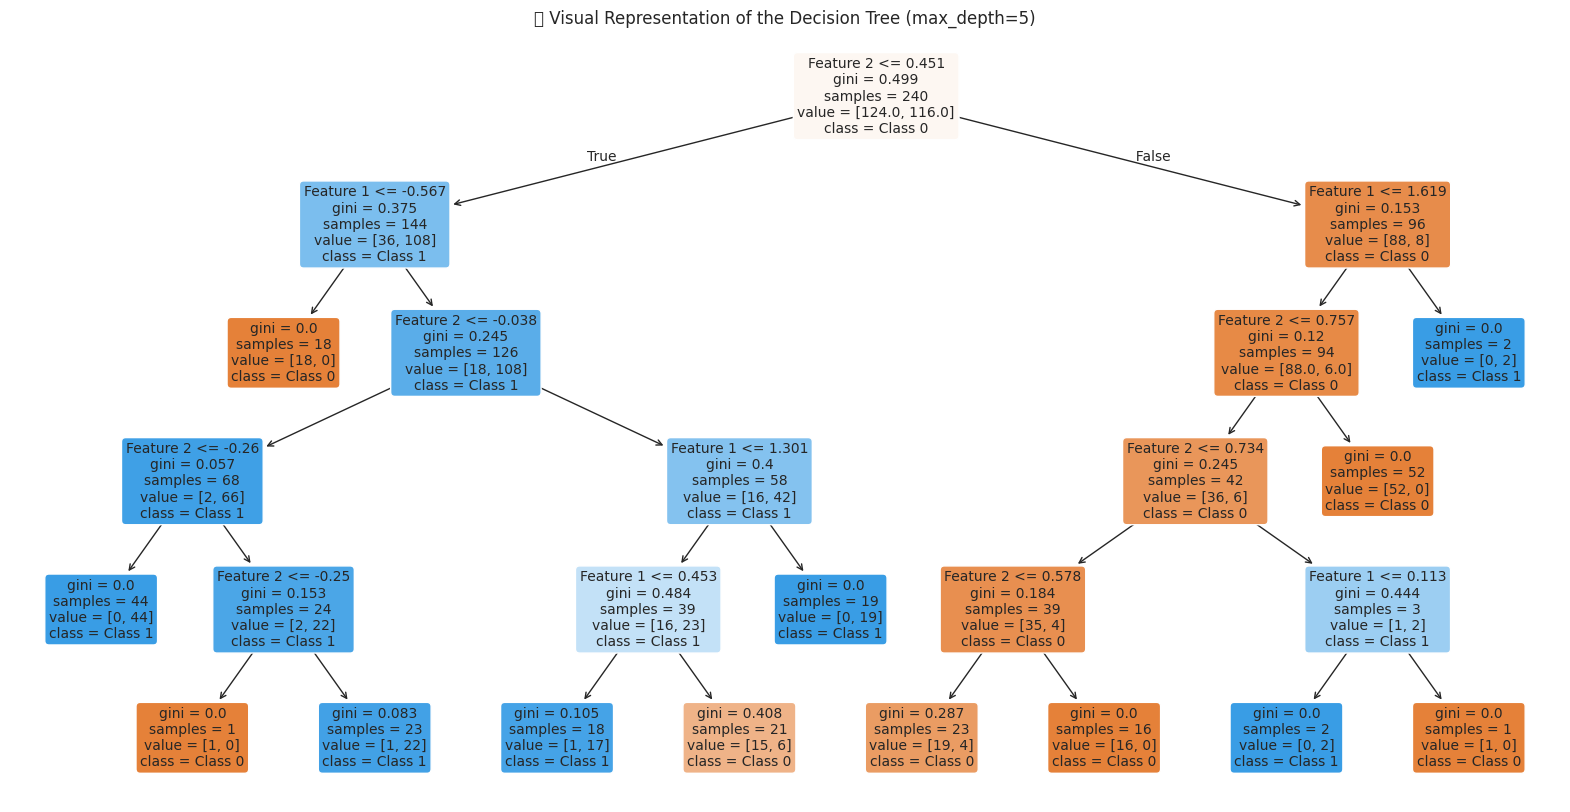

In [44]:
from sklearn.tree import plot_tree

# Plot the trained decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model,
          filled=True,
          feature_names=["Feature 1", "Feature 2"],
          class_names=["Class 0", "Class 1"],
          rounded=True,
          fontsize=10)
plt.title("🌳 Visual Representation of the Decision Tree (max_depth=5)")
plt.show()


#📌 Explanation:

filled=True: Color nodes based on predicted class.

rounded=True: Rounded boxes for better readability.

feature_names: Feature labels shown at decision points.

class_names: Label each class for clarity.

fontsize: Adjust font for better visibility in Colab.

max_depth=5: Limits tree depth to avoid clutter (already defined in your model).